<h3>Heart Disease Dataset</h3>
<p>this data contains some information and feature about pepole that have or not heart disease according to some feature
    such 
    <ul>
        <li>age </li>
        <li>sex 0 female , 1 male </li>
        <li>cp - chest pain </li>
        <li>trestbps blood presure </li>
        <li>fbs fasting blood presure </li>
        <li>restach resting electrocardiographic results</li>
        <li>thalach</li>
        <li>exang exercise induced angina </li>
        <li>oldpeak</li>
        <li>slope </li>
        <li>target (0 not have disease , 1 have disease )</li>
        <li>...</li>
    </ul>
</p>

In [6]:
import numpy as np #for numerical analysis
import pandas as pd #for data loading , anlaysis and manipulation
import matplotlib as mpl #for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns #for fast and powerful data visualization 
%matplotlib inline 

In [7]:
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [8]:
#set configuration for charts 
mpl.rcParams["figure.figsize"]=[14 , 7]
mpl.rcParams["font.size"]=15
mpl.rcParams["legend.fontsize"]="medium"
mpl.rcParams["figure.titlesize"]="medium"

In [9]:
#set configuration for DataFram
pd.set_option("display.max_columns" , None)

In [10]:
#load data 
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
heart.shape

(303, 14)

In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#check missing value 
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
assert heart.isnull().sum().sum() == 0

### data hasn't contain any missing value

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
heart[heart["chol"]>=350]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


<AxesSubplot:xlabel='age'>

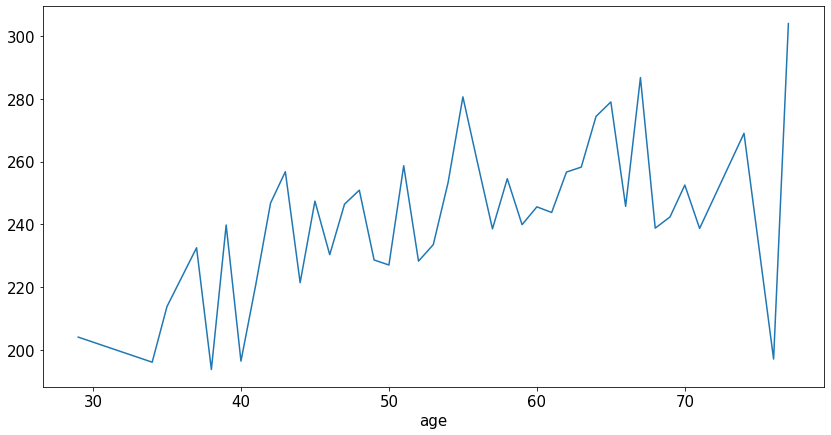

In [19]:
heart.groupby(["age"])["chol"].mean().plot(kind ="line")

In [23]:
def plot_disribution(data , x ,color,bins ):
    mean = data[x].mean()
    std = data[x].std()
    info=dict(data = data , x =x , color = color)
    plt.subplot(1 , 3 , 1 , title =f"ditstribution of {x}")
    sns.distplot(a=data[x] , bins = bins )
    plt.xlabel(f"bins of {x}")
    plt.axvline(mean , label ="mean" , color ="red")
    plt.ylabel("frequency")
    plt.legend(["${\sigma}$ = %d"%std , f"mean = {mean:.2f}"])
    plt.title(f"histogram of {x}")
    plt.subplot(1 , 3 , 2)
    sns.boxplot(**info)
    plt.xlabel(f"{x}")
    plt.title(f"box plot of {x}")
    plt.subplot(1 , 3 , 3)
    sns.swarmplot(**info)
    plt.xlabel(f"{x}")
    plt.title(f"distribution of points in {x} column")
    plt.suptitle(f"distribution of {x}" , fontsize =15 , color="red")

In [24]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [74]:
heart.rename(columns={"target":"have disease"} , inplace=True)
heart.replace({1:"yes" , 0:"no"} , inplace =True)

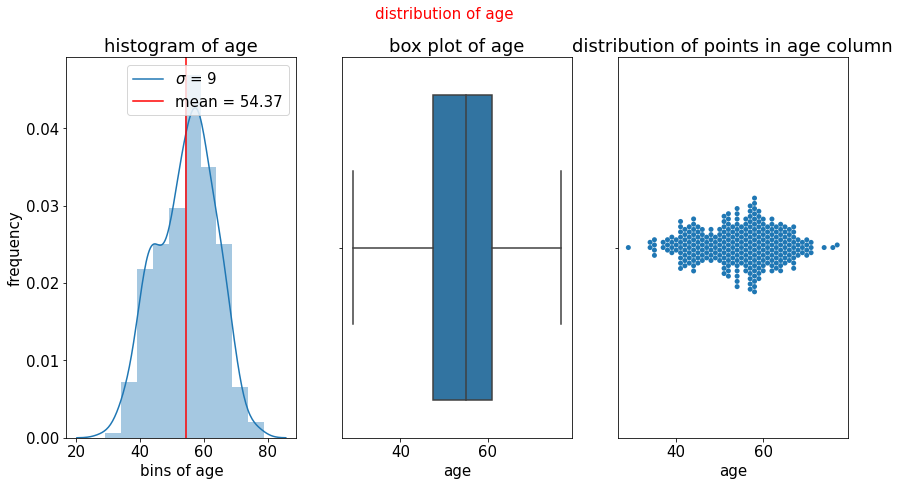

In [25]:
age_bins = np.arange(29 , 77+5 , 5)
base_color = sns.color_palette()[0]
plot_disribution(data = heart , x ="age" , color = base_color , bins=age_bins )

<h4>Age</h4>
    <ul>
<li><p> mean of age of pepole is <mark>54 </mark> most of ages betwwen <mark>45</mark> and <mark>60</mark></p></li>
    <li><p>distribution of ages is approximately normal distribution </p></li>
    <li> <p> the most ranges that people in 
        <ol>
            <li>from 40 to 45</li>
            <li>from 54 to 65</li>
        </ol>
    </li>
    <li><p> there are no outlier in ages </p></li>
   </ul>

In [81]:
def plot_hist(data , x , bins , hue , height_of_text ):
    mean_have_heart_disease = data[data[hue]=='yes'][x].mean()
    mean_not_have_heart_disease = data[data[hue]=='no'][x].mean()
    sns.histplot(data = data , x = x , hue = hue , bins =bins , stat="density" , common_norm=False ,
                palette=["b" , "red"])
    plt.axvline(mean_have_heart_disease , label ="have heart disease" , color ="b")
    plt.text(mean_have_heart_disease-3 ,height_of_text , f"{mean_have_heart_disease:0.2f}-->" , 
            ha ="center" , va ="center")
    plt.text(mean_not_have_heart_disease+3 , height_of_text , f"<--{mean_not_have_heart_disease:0.2f}" , 
            ha = "center" , va ="center")
    plt.axvline(mean_not_have_heart_disease , label ="havn't heart disease" , color ="r")
    plt.legend(labels =["have heart disease" , "haven't heart disease"])

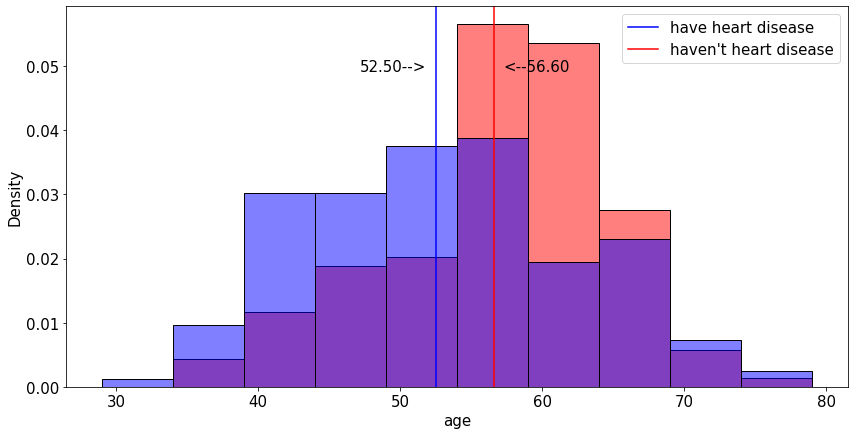

In [82]:
plot_hist(data =heart , x ="age" , bins = age_bins , hue="have disease" , height_of_text=0.05)

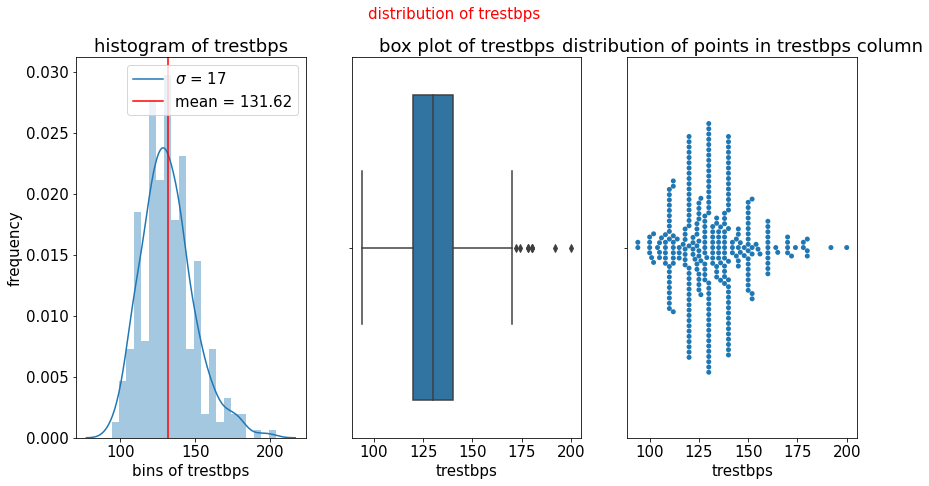

In [27]:
trestbps_bins = np.arange(94,200+5 , 5)
plot_disribution(data = heart , x ="trestbps" , color=base_color , bins = trestbps_bins)

<h5>trestbps</h5>
<ul>
    <li><p> mean of trestbps of pepole is <mark>131 mm Hg</mark></li>
    <li><p> there are outlier in trestbps column </p></li>
    <li><p>there are few people only have trestbps greaer than 170 about 6 or 7 peoples </p></li> 
    <li><p>most of pepole have a high presesure </p></li>
</ul>
    

<div id ="Q1">
    <h3> Q1 :there are exist relationship between ages and trestbps ?🤔 </h3>
    </div>
    

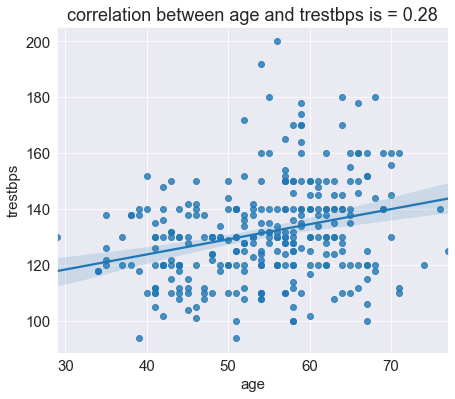

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(7 , 6))
sns.regplot(data=heart , x ="age" , y ="trestbps")
plt.title(f"correlation between age and trestbps is = {heart['trestbps'].corr(heart['age']):.2f}")
plt.show()

In [15]:
#anthor way to make sure that there are a correlation between them
heart["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [16]:
heart["age_bins"]= pd.cut(heart["age"] , bins=[29 , 40 , 50 , 60 ,  80] , labels=["adult" , "fortieth" , "old" , "ancient"] )

In [17]:
def count_plot(data  , x=None , y=None  , figsize =None , title =None , color =None , prop=False , rotation_x =0 ):
    if x is None and y is None :
        raise("Expected y or x")
    if x is not None and y is not None:
        raise("Expected y or x not both")
    count_type = data[y if x is None else x].value_counts(ascending =False)
    Sum = count_type.sum()
    type_order = count_type.index
    plt.figure(figsize=figsize if figsize is None else (12 , 7))
    if x is None:
        sns.countplot(data = data , y=y , color = color ,order=type_order)
        if prop==True:
            for i in range(len(count_type)):
                count = count_type[i]
                pct_string ="{:0.1f}%".format(100*count/Sum)
                plt.text(count+1 , i , pct_string , va="center")
        if prop==False:
            for i in range(len(count_type)):
                count = count_type[i]
                pct_string ="{}".format(count)
                plt.text(count+1 , i , pct_string , va="center")
        plt.title(title)
        plt.show()
    if y is None :
        sns.countplot(data = data , x = x , color = color , order = type_order)
        locs , labels =plt.xticks(rotation = rotation_x)
        if prop == True :
            for loc , label in zip(locs , labels):
                count = count_type[label.get_text()]
                pct_string ="{:0.1f}%".format(100*count/Sum)
                plt.text(loc , count+2 ,pct_string,ha ="center")
        if prop==False :
            for loc , label in zip(locs , labels):
                count = count_type[label.get_text()]
                pct_string ="{}".format(count)
                plt.text(loc , count+2 ,pct_string,ha ="center")
        plt.title(title)
        plt.show()

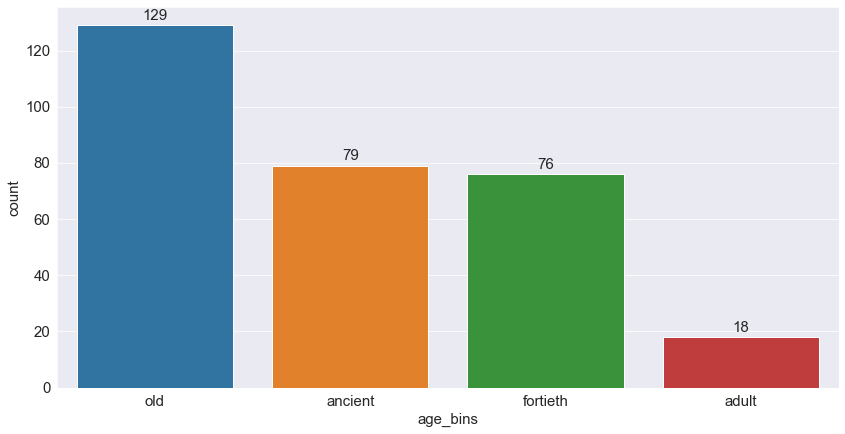

In [18]:
count_plot(data = heart , x ="age_bins")

In [19]:
corr = heart.groupby(["age_bins"])[["trestbps" , "age"]].corr()
corr.head()

trestbps       age
age_bins                             
adult    trestbps  1.000000  0.202649
         age       0.202649  1.000000
fortieth trestbps  1.000000  0.144634
         age       0.144634  1.000000
old      trestbps  1.000000  0.173218

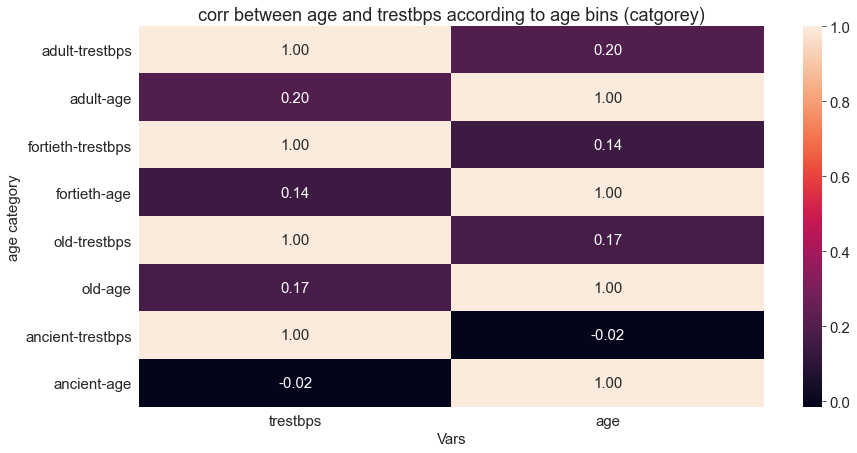

In [20]:
sns.heatmap(corr , annot=True , fmt =".2f")
plt.xlabel("Vars")
plt.ylabel("age category")
plt.title("corr between age and trestbps according to age bins (catgorey)")
plt.show()

<h4>Answer of Q1</h4>
<p> yse there are a significant postive correlation between <mark>ages </mark> and <mark> trestbps</mark>

In [21]:
heart["sex"].replace({0:"female" , 1:"male"} , inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1,ancient
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1,adult
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1,fortieth
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1,old
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1,old


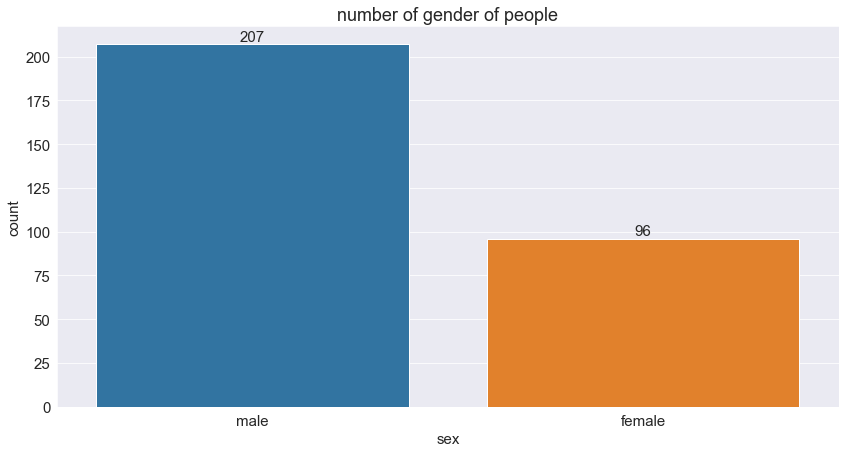

In [22]:
count_plot(data = heart , x ="sex" , title="number of gender of people")

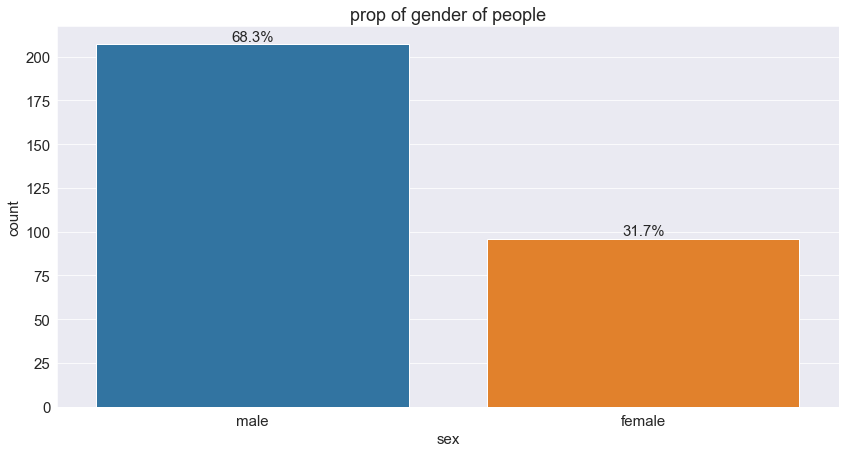

In [23]:
count_plot(data = heart , x ="sex" , prop=True , title="prop of gender of people")

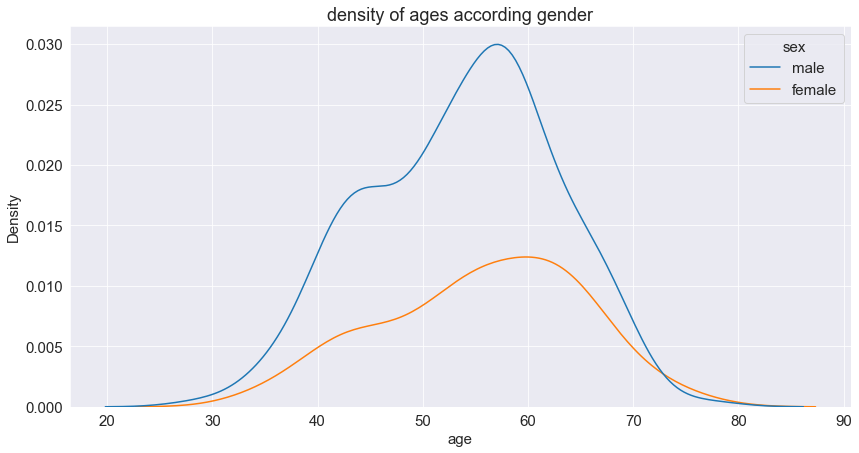

In [24]:
#what average of ages in each categorey 
sns.kdeplot(data = heart , x ="age" , hue ="sex" )
plt.title("density of ages according gender")
plt.show()

<div id ="Q1">
    <h3> Q2 :there are exist relationship between age and trestbps  for every gender?🤔 </h3>
    </div>
    

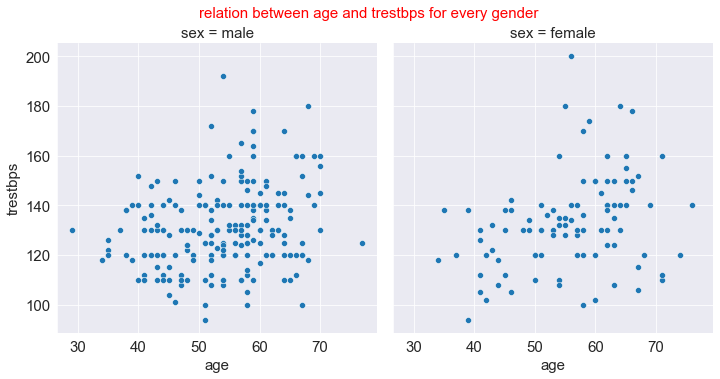

In [25]:
g =sns.relplot(data = heart , x ="age" , y ="trestbps" , col ="sex" )
g.fig.suptitle("relation between age and trestbps for every gender" , y=1.01 , color ="red" )
plt.show()

<h3>Answer Q2</h3>
<p>from chart we infers that gender didn't influence the trestbps while age increased </p>

In [26]:
heart["chol"].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

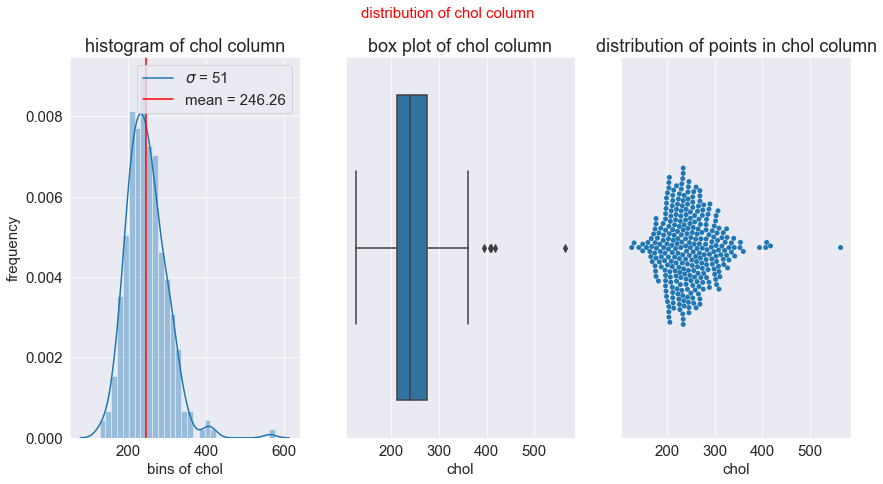

In [27]:
chol_bins = np.arange(126 , 564+15 , 15)
plot_disribution(data = heart , x ="chol" , color= base_color , bins = chol_bins)

<h3>chol info</h3>
<ul>
    <li>chol in range 126 to 350 is approximatly normal distrubition </li>
    <li>mean of chol of people is 246 mg/dl</li>
    <li>a few people have chol greater than 350 mg/dl </li>
    </ul>

visulaize target frist to put some question 

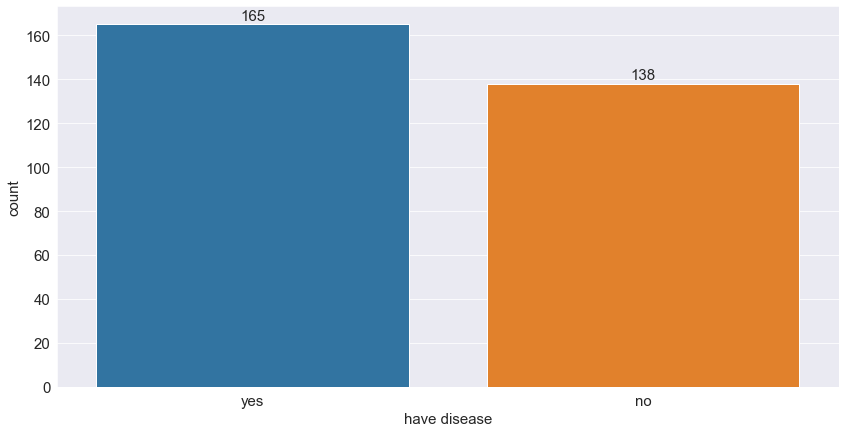

In [29]:
count_plot(data = heart , x ="have disease")

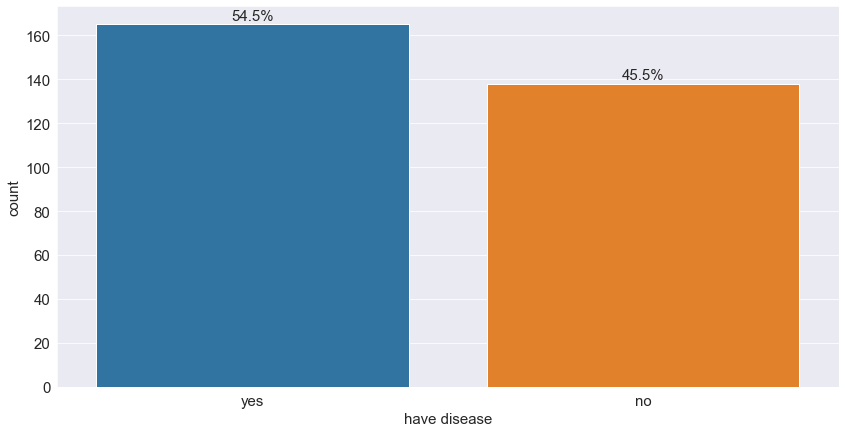

In [30]:
count_plot(data = heart , x ="have disease" , prop=True)

In [31]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,have disease,age_bins
0,63,male,3,145,233,yes,no,150,no,2.3,no,no,yes,yes,ancient
1,37,male,2,130,250,no,yes,187,no,3.5,no,no,2,yes,adult
2,41,female,yes,130,204,no,no,172,no,1.4,2,no,2,yes,fortieth
3,56,male,yes,120,236,no,yes,178,no,0.8,2,no,2,yes,old
4,57,female,no,120,354,no,yes,163,yes,0.6,2,no,2,yes,old


<h3 id ="Q3">Q3 :what heights percentage of chol that make person have heart disease ? 🤔</h3>

In [32]:
heart.groupby(["have disease"])["chol"].mean()

have disease
no     251.086957
yes    242.230303
Name: chol, dtype: float64

In [33]:
have_disease =heart[heart["have disease"]=="yes"]
not_disease = heart[heart["have disease"]=="no"]

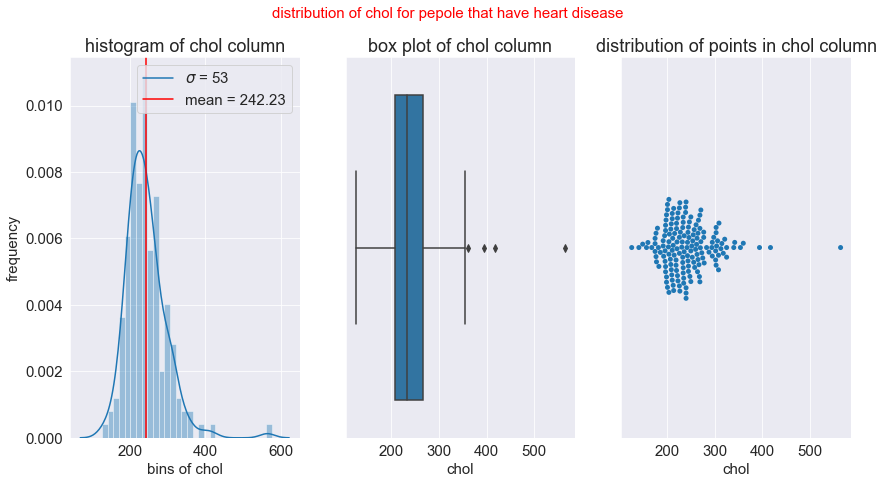

In [34]:
plot_disribution(data = have_disease , x ="chol" , color=base_color , bins=chol_bins)
plt.suptitle("distribution of chol for pepole that have heart disease" , color="red" , fontsize=15)
plt.show()

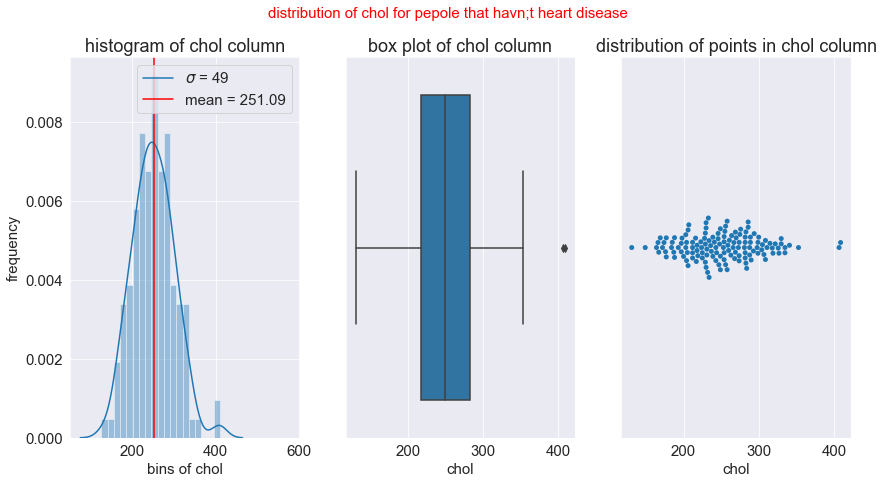

In [35]:
plot_disribution(data = not_disease , x ="chol" , color=base_color , bins=chol_bins)
plt.suptitle("distribution of chol for pepole that havn;t heart disease" , color="red" , fontsize=15)
plt.show()

<h3>Q3 Answer</h3>
<p>from chart above we can infers that </p>
<ul>
    <li>first most of chol distribution in twe subset of data (have or not disesase) are approxiamtly normal distribution</li>
    <li>secound we see that most of peoplt that have high chol greater than 400 mg/dl have heart disease</li>
    <li>conclisoin in normal case that in 126 to 400 we can't make sure that person have or not heart disease but if he have chol that greater than 450 we have dought that he have heart disease </li>
    </ul>

<h3 id ="Q4">Q4 :Is age have impact in percantage of chol ? 🤔</h3>

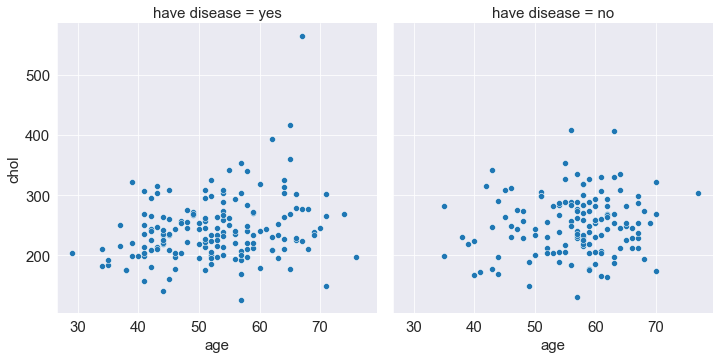

In [36]:
sns.relplot(data = heart , x ="age" , y ="chol" , col="have disease" , kind ="scatter")
plt.show()

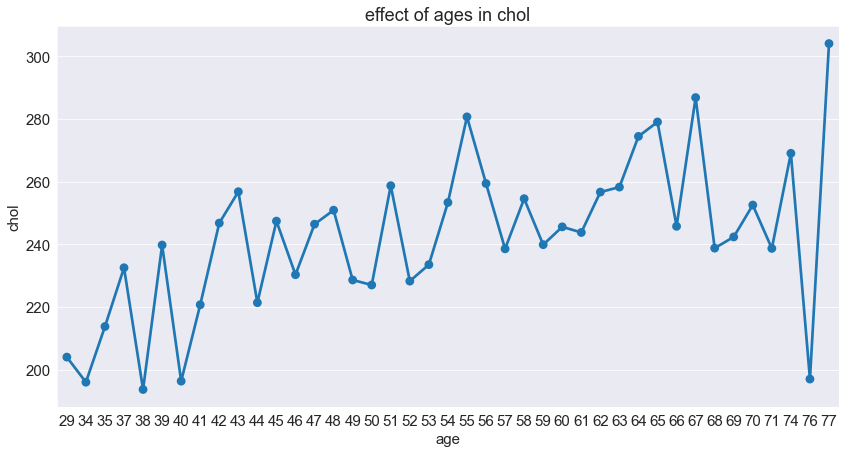

In [37]:
sns.pointplot(data=heart , x ="age" , y ="chol" , ci=None)
plt.title("effect of ages in chol")
plt.show()

In [38]:
plot_data =heart.groupby(["have disease"])[["age" , "chol"]].corr()
plot_data.head()

age      chol
have disease                         
no           age   1.000000  0.112610
             chol  0.112610  1.000000
yes          age   1.000000  0.257154
             chol  0.257154  1.000000

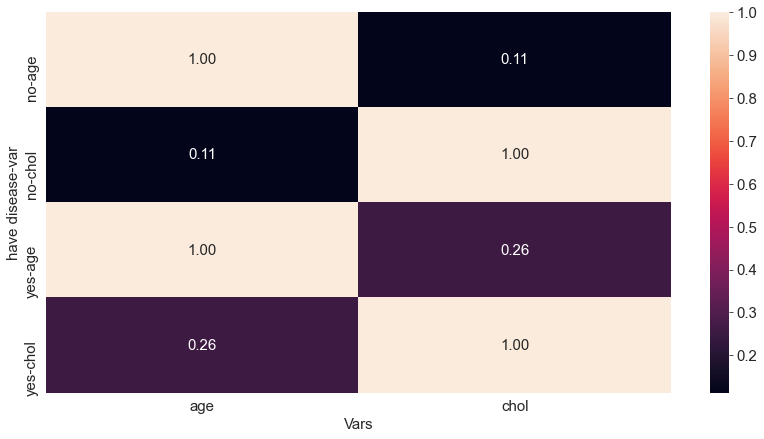

In [39]:
sns.heatmap(plot_data , annot=True , fmt =".2f")
plt.xlabel("Vars")
plt.ylabel("have disease-var")
plt.show()

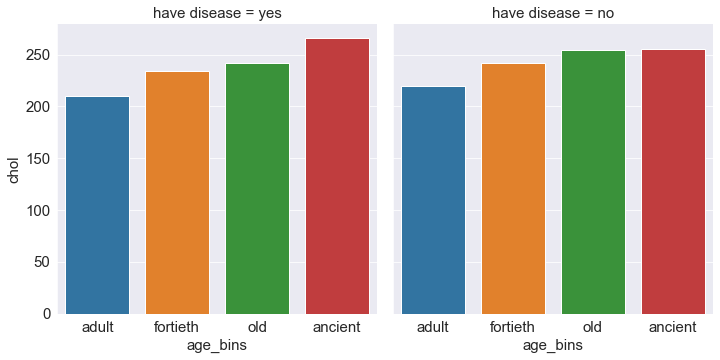

In [114]:
sns.catplot(data = heart , x ="age_bins" , y ="chol" , col ="have disease" , 
           kind="bar" , ci =None)
plt.show()

<h3>Answer Q4</h3>
<ol>
    <li>first we can infers that increse of age may be lead to increasing in chol but not always </li>
    <li>secound we can infers that chol in ancient pepole in case of he have disease is graeter than if he haven't disesase</li>
</ol>

<h3>cp - chest pain type</h3>
<ul>
    <li>0: Typical angina: chest pain related decrease blood supply to the heart</li>
    <li>1: Atypical angina: chest pain not related to heart</li>
    <li>2: Non-anginal pain: typically esophageal spasms (non heart related)</li>
    <li>3: Asymptomatic: chest pain not showing signs of disease</li>
</ul>

In [41]:
heart["cp"].unique()

array([3, 2, 'yes', 'no'], dtype=object)

In [42]:
cp_converted ={"no" : "Typical Angina", 
                 "yes" : "Atypical Angina",
                 2 : "Non-anginal pain" , 
                 3 : "Asymptomatic"}

In [43]:
heart.rename(columns ={"cp":"chest_pain"} , inplace =True)
heart["chest_pain"].replace(cp_converted , inplace =True)

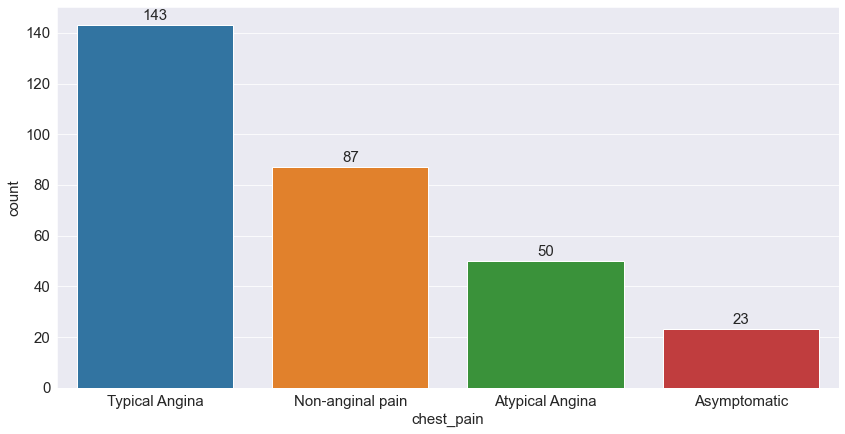

In [44]:
count_plot(data = heart , x ="chest_pain" )


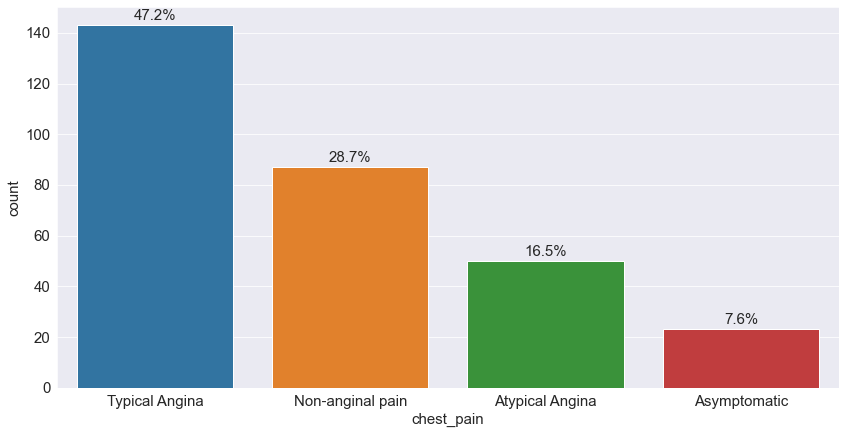

In [45]:
count_plot(data = heart , x ="chest_pain" , prop=True)

<h3 id ="Q5">Q5 :which type of chest pain has a big impact in heart disease ?🤔</h3>

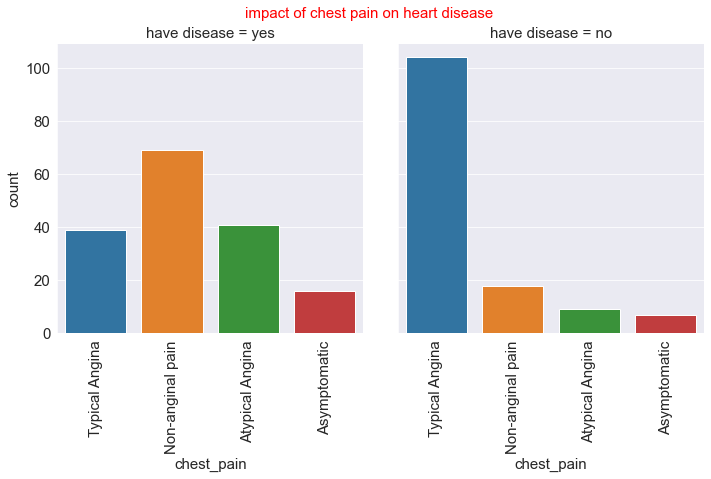

In [46]:
order_type = heart["chest_pain"].value_counts(ascending =False).index
g = sns.catplot(data = heart , x ="chest_pain" , kind="count" , order=order_type , col ="have disease" )
g.set_xticklabels(rotation =90)
plt.suptitle("impact of chest pain on heart disease" , y =1.01 , color ="red" , fontsize =15)
plt.show()

<h3>Answer Q5</h3>
<p>from chart above we can infers that <mark>typical Angina</mark> has most impact on heart disease than other .</p>

<h3 id ="Q6">Q6 :which kind of chest pain dependent on chol increasing? and also is it influence more in people that
    have disease or not ?  🤔</h3>

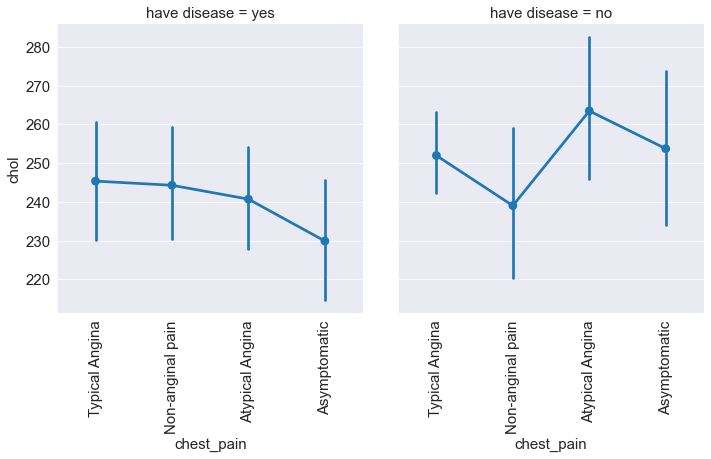

In [119]:
g =sns.catplot(data = heart , x ="chest_pain"  , y ="chol", kind="point" , order=order_type , col ="have disease" , 
              ci =95)
g.set_xticklabels(rotation =90)
plt.show()

<h3>Answer Q6 </h3> 
 <ol>
     <li>as we see in first chart in the more <mark>chol in blood</mark> it lead to normaly <mark>Typical Angina . </mark> </li> 
    <li>according to secound part of question impact of <mark>chol</mark> in <mark>chest pain </mark> in case of pepole that have heart disease not other </li>
 </ol>

<h3>fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</h3>

In [48]:
heart["fbs"].replace({"yes":"have diabetes" , "no":"haven't diabetes"} , inplace =True)

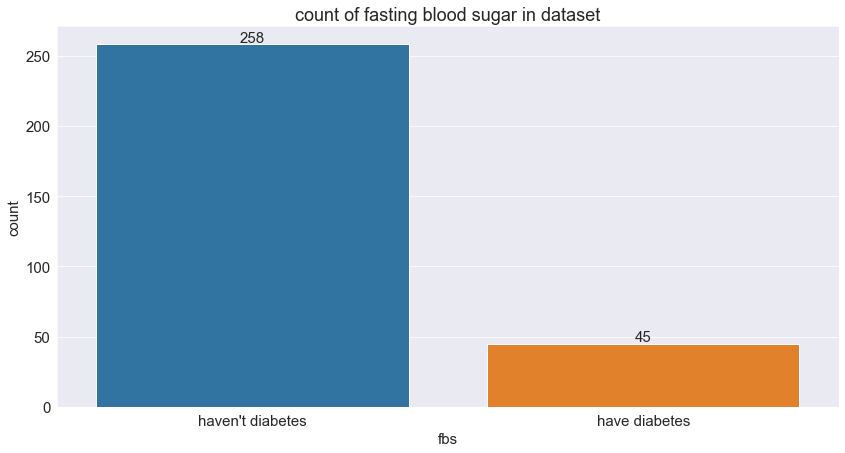

In [49]:
count_plot(data = heart , x ="fbs" , title="count of fasting blood sugar in dataset")

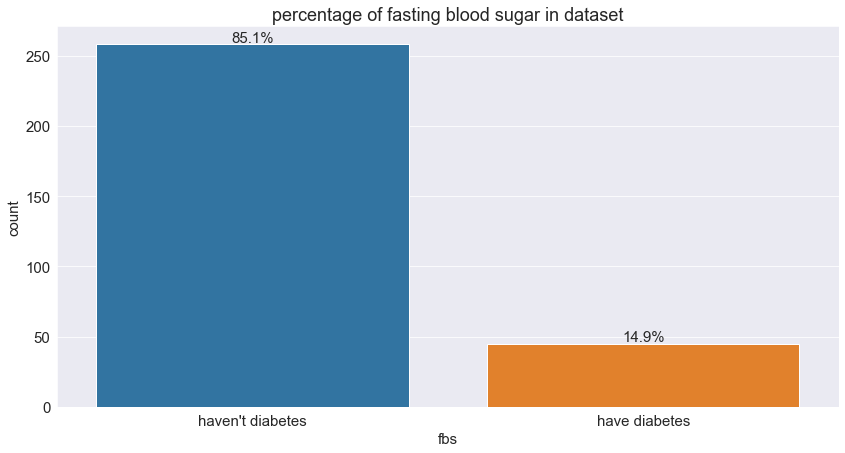

In [50]:
count_plot(data = heart , x ="fbs" , title="percentage of fasting blood sugar in dataset" , prop=True)

<h3 id ="Q7">Q7: Is blood suagar impact on heart disease ? 🤔</h3>

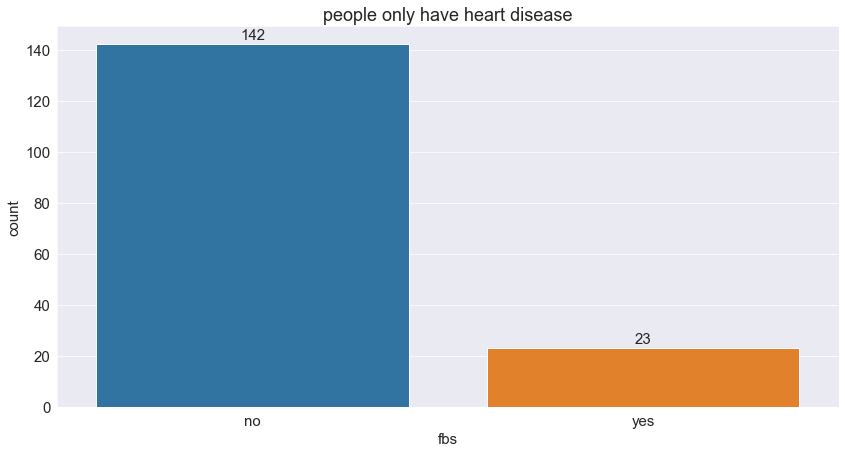

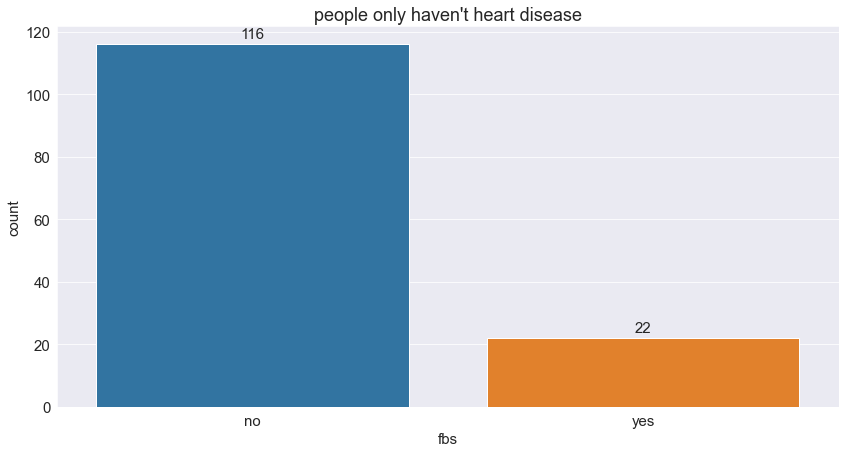

In [51]:
count_plot(data = have_disease , x ="fbs" , title="people only have heart disease")
count_plot(data = not_disease , x ="fbs" , title="people only haven't heart disease")

<h3> Answer Q7</h3>
<p>sugar diabetes hasn't an impact on heart disease</p>

<h3 id ="Q8">Q8: Is chol effect on sugar diabetes ? 🤔</h3>

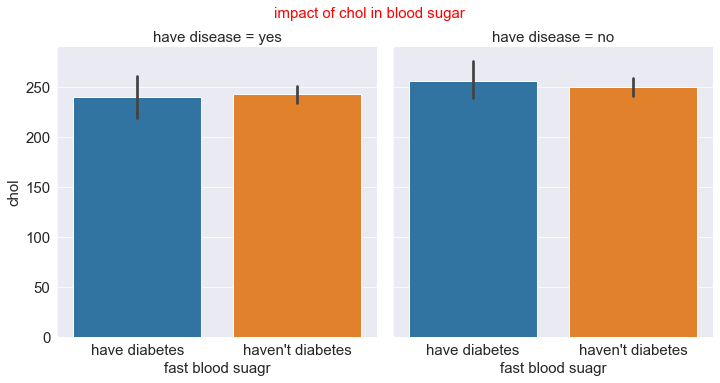

In [52]:
g = sns.catplot(data = heart , x ="fbs" , y ="chol" , col ="have disease" , kind ="bar")
plt.suptitle("impact of chol in blood sugar" , fontsize=15 , color ="red" , y=1.02)
g.set_xlabels("fast blood suagr")
plt.show()

In [53]:
plot_data =heart.groupby(["fbs" , "have disease"])["chol"].mean().reset_index()
plot_data.head()

,fbs,have disease,chol
0,have diabetes,no,256.318182
1,have diabetes,yes,239.869565
2,haven't diabetes,no,250.094828
3,haven't diabetes,yes,242.612676


<h3>Answer Q8</h3>
<p>chol hasn't a big effect on blood sugar .</p>

In [54]:
have_disease = heart[heart["have disease"]=="yes"]
not_disease = heart[heart["have disease"]=="no"]

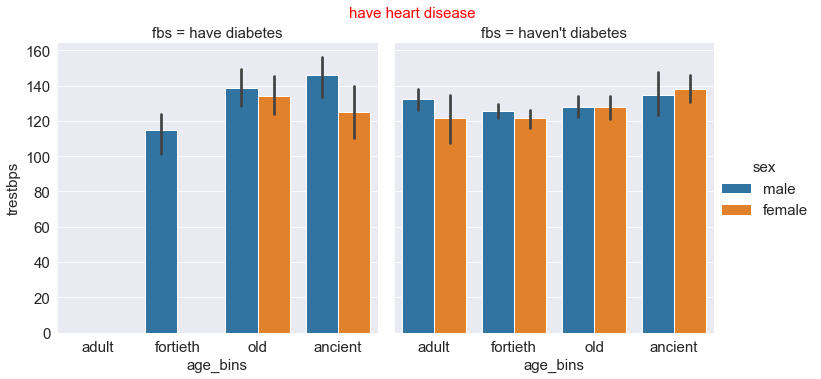

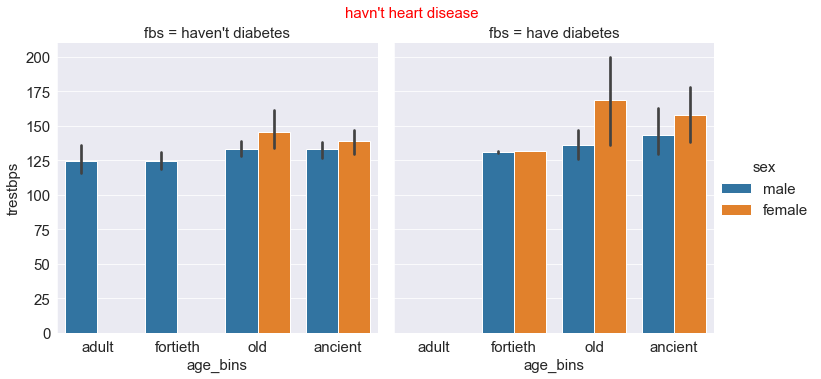

In [120]:
sns.catplot(data = have_disease , x ="age_bins" , y = "trestbps" , hue ="sex" , 
           col="fbs" , kind ="bar" , ci =95)
plt.suptitle("have heart disease" , color ="red" , fontsize =15 , x=0.5 , y =1.01)
####################################################################################
sns.catplot(data = not_disease , x ="age_bins" , y = "trestbps" , hue ="sex" , 
           col="fbs" , kind ="bar" , ci=95)
plt.suptitle("havn't heart disease" , color ="red" , fontsize =15 , x=0.5 , y =1.01)
plt.show()

<h3>quick conclision of this graphs </h3>
<ul>
    <li>men who suffer from heart disease and also have diabetes when age increase the trestbps increased</li>
    <li>women who suffer from heart disease and also have diabets (not influenced more as we see) when age increase 
        the trestbps increased</li>
    </ul>

<h3>restecg - resting electrocardiographic results</h3>
<ul>
    <li>0: Nothing to note</li>
    <li>1: ST-T Wave abnormality
        <ul>
            <li>can range from mild symptoms to severe problems</li>
            <li>signals non-normal heart beat</li>
        </ul>
    </li>
    <li>2: Possible or definite left ventricular hypertrophy</li>
</ul>

In [56]:
heart["restecg"].unique()

array(['no', 'yes', 2], dtype=object)

In [57]:
data_converted={"no":"Nothing to note" , 
               "yes":"SF-T" , 
               2:"left ventricular hypertrophy"}
heart["restecg"].replace(data_converted , inplace =True)
heart["restecg"].head()

0    Nothing to note
1               SF-T
2    Nothing to note
3               SF-T
4               SF-T
Name: restecg, dtype: object

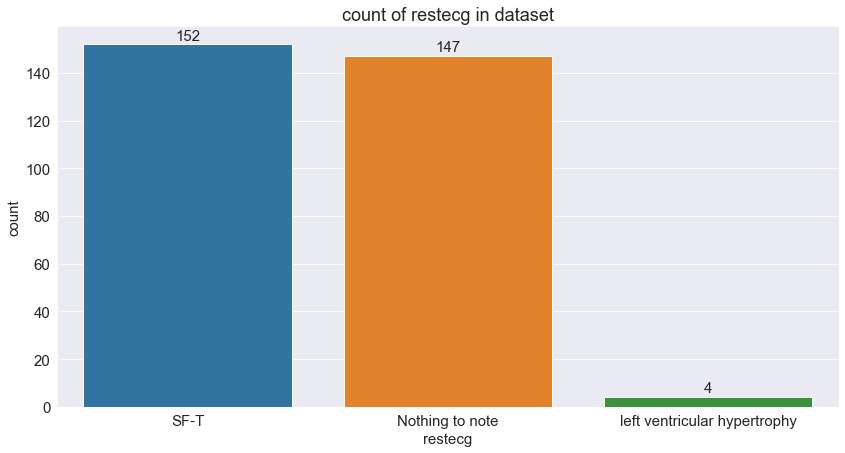

In [58]:
count_plot(data = heart , x ="restecg"  , title="count of restecg in dataset")

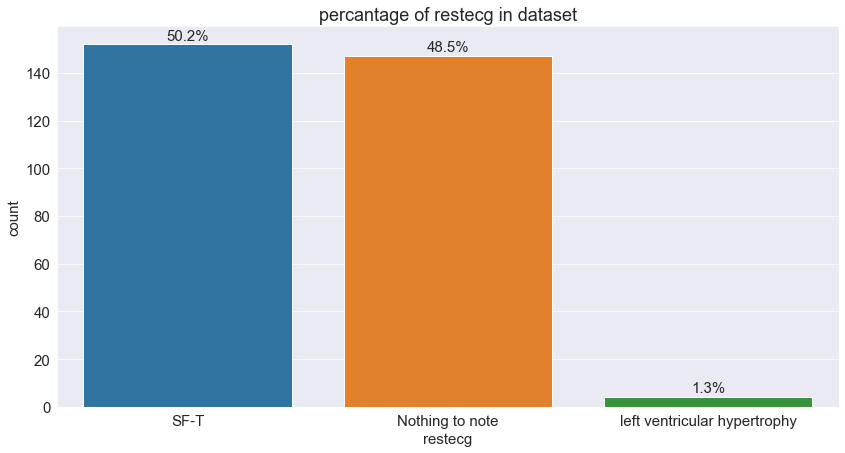

In [59]:
count_plot(data = heart , x ="restecg"  , title="percantage of restecg in dataset" , prop=True)

<h3 id ="Q9">Q9: which type of restecg has more impact on heart disease ? 🤔</h3>

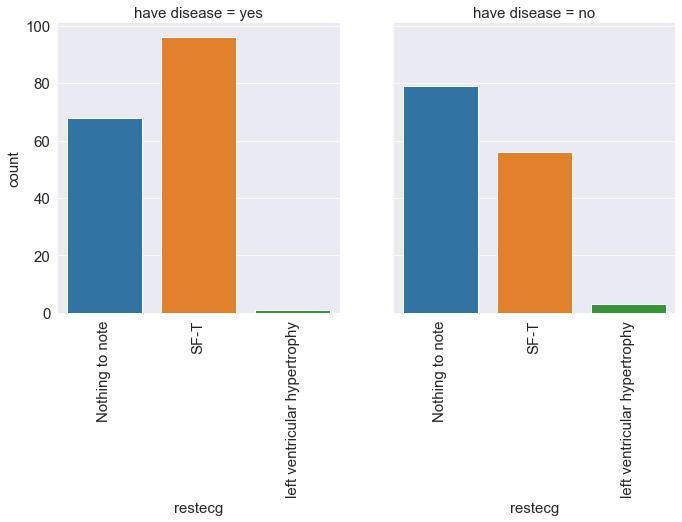

In [60]:
g =sns.catplot(data = heart , x ="restecg" , col ="have disease" , kind ="count")
g.set_xticklabels(rotation =90)
plt.show()

<h3>Answer Q9</h3>
<p>the type SF-T has most impact on heart disease </p>

<h3>thalach - maximum heart rate achieved</h3>

In [61]:
heart["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

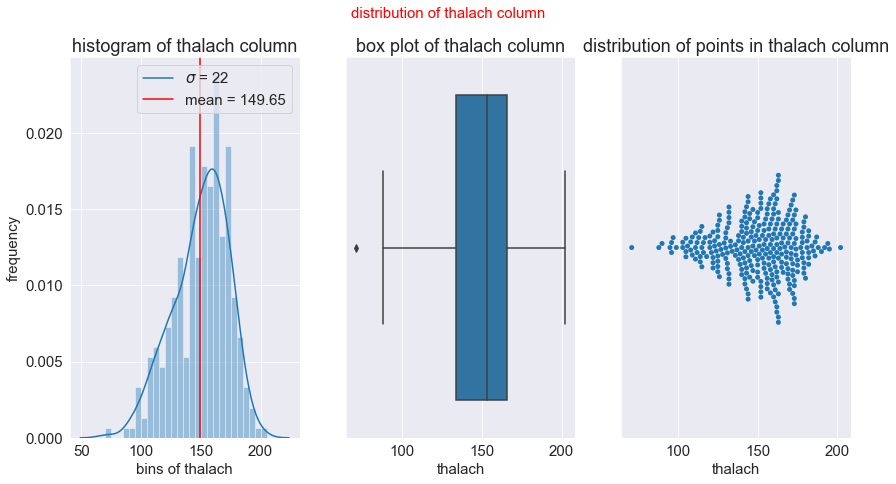

In [62]:
thalach_bins = np.arange(70 , 202+15 , 5)
plot_disribution(data = heart , x ="thalach" , color = base_color , bins = thalach_bins)

<h3>thalach</h3>
<ol>
    <li>mean of thalach is 150 </li>
    <li>there are a few people have thalach less than 100 and one person he have thalach greater than 200</li>
    <li>the distribution of thalach have skewed to left </li>
 </ol>

<h3 id ="Q10">Q10 :threre are a relationship between <i>thalach</i> and <i>trestbps</i> ? 🤔</h3> 

In [63]:
plot_data =heart[["trestbps" , "thalach"]].corr()
plot_data

,trestbps,thalach
trestbps,1.000000,-0.046698
thalach,-0.046698,1.000000


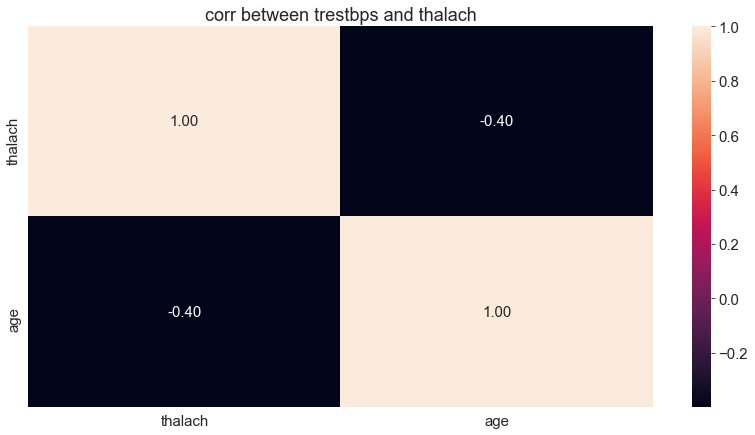

In [116]:
sns.heatmap(plot_data , annot=True , fmt =".2f")
plt.title("corr between trestbps and thalach")
plt.show()

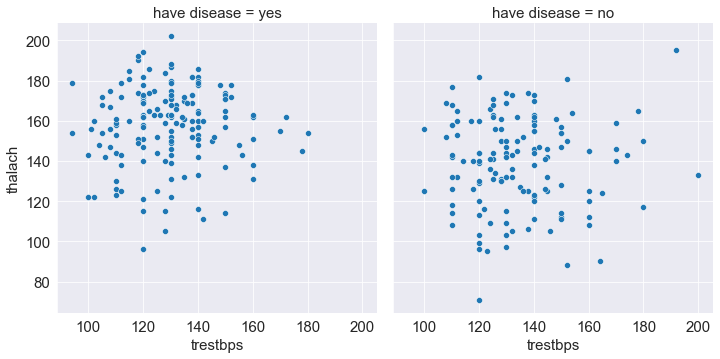

In [117]:
sns.relplot(data = heart ,x="trestbps" , y="thalach"  , col="have disease")
plt.show()

In [66]:
heart.groupby(["have disease"])[["trestbps" , "thalach"]].corr()

trestbps   thalach
have disease                             
no           trestbps  1.000000  0.005595
             thalach   0.005595  1.000000
yes          trestbps  1.000000  0.028039
             thalach   0.028039  1.000000

<h3>Answer Q10</h3>
<p>threr are no relationship bewtween trestbps and thalach </p>

<h3 id ="Q11">Q11 :threre are a relationship between <i>thalach</i> and <i>age</i> ? 🤔</h3> 

In [67]:
plot_data =heart[["thalach" , "age"]].corr()
plot_data

,thalach,age
thalach,1.000000,-0.398522
age,-0.398522,1.000000


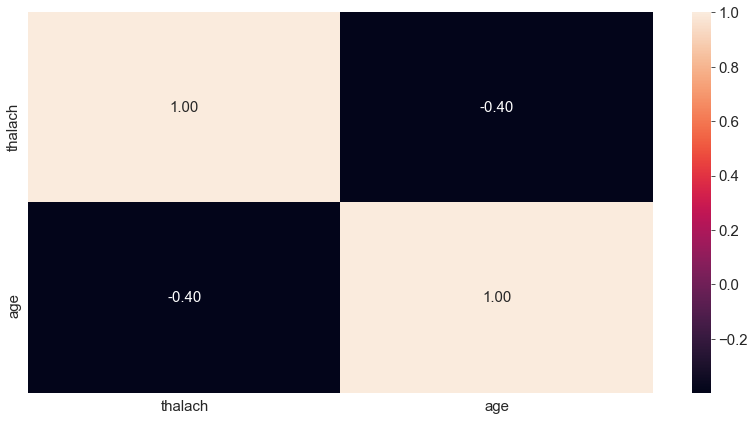

In [68]:
sns.heatmap(plot_data , annot=True , fmt =".2f")
plt.show()

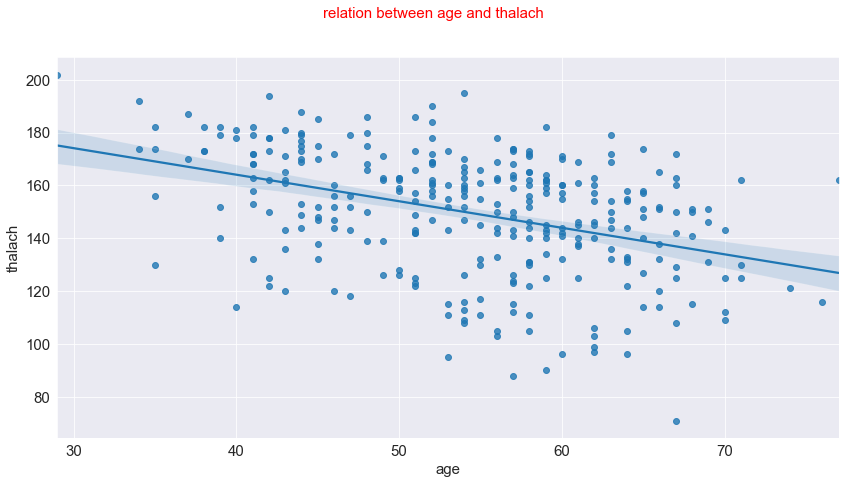

In [69]:
sns.regplot(data = heart , x ="age",y ="thalach" )
plt.suptitle("relation between age and thalach " , color ="red" , fontsize =15)
plt.show()

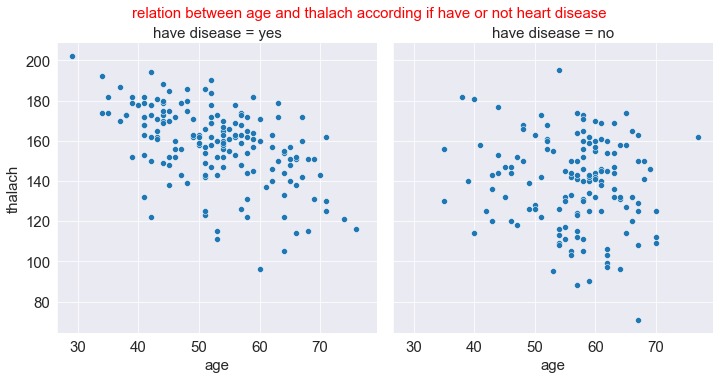

In [70]:
sns.relplot(data = heart , x ="age" , y="thalach" , col ="have disease")
plt.suptitle("relation between age and thalach according if have or not heart disease" , y =1.01 , color ="red" , 
            fontsize =15)
plt.show()

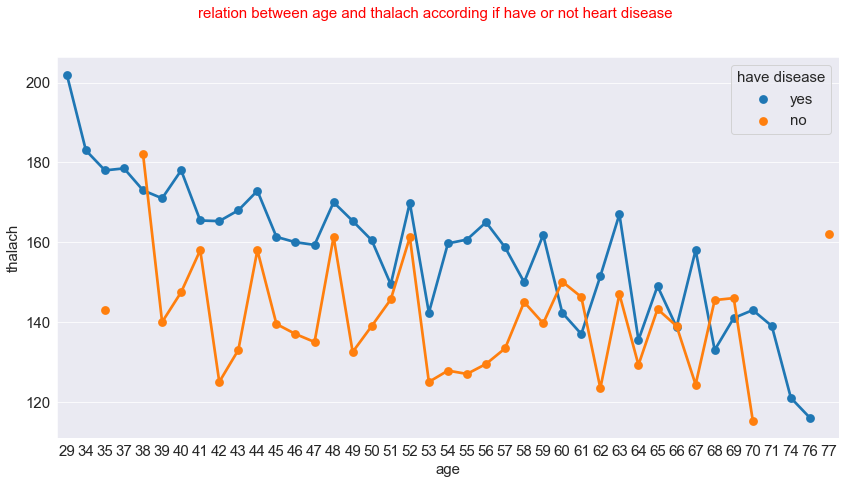

In [71]:
g =sns.pointplot(data = heart , x ="age" , y="thalach" , hue ="have disease" , ci =None)
plt.suptitle("relation between age and thalach according if have or not heart disease" , color ="red" , fontsize =15)
plt.show()

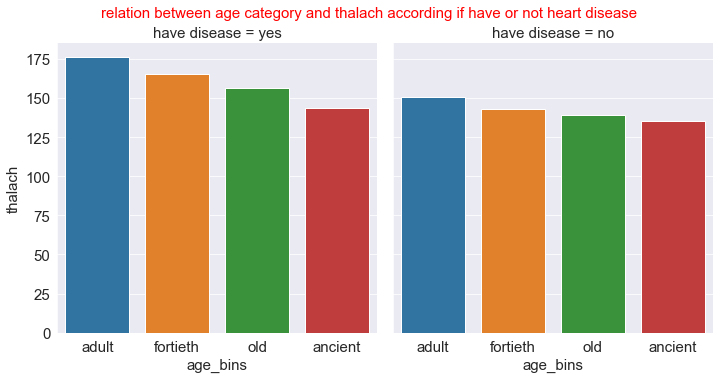

In [72]:
sns.catplot(data = heart , x ="age_bins" , y="thalach" , col ="have disease" , ci =None , 
           kind ="bar")
plt.suptitle("relation between age category and thalach according if have or not heart disease" , color ="red" , fontsize =15 ,
            y =1.01)
plt.show()

<h3>Answer Q11</h3>
<ol>
    <li>in case of people have heart disease when age increased the thalach decresed </li>
    <li>also in case of not heart disease but impact can appear more in case of heart disease</li>
    </ol>

<h3>exang - exercise induced angina (1 = yes; 0 = no)</h3>

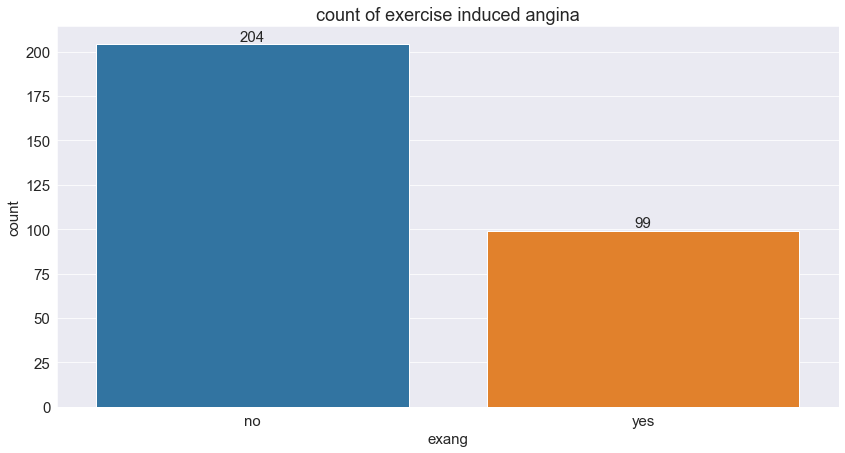

In [73]:
count_plot(data = heart , x ="exang" , title="count of exercise induced angina")

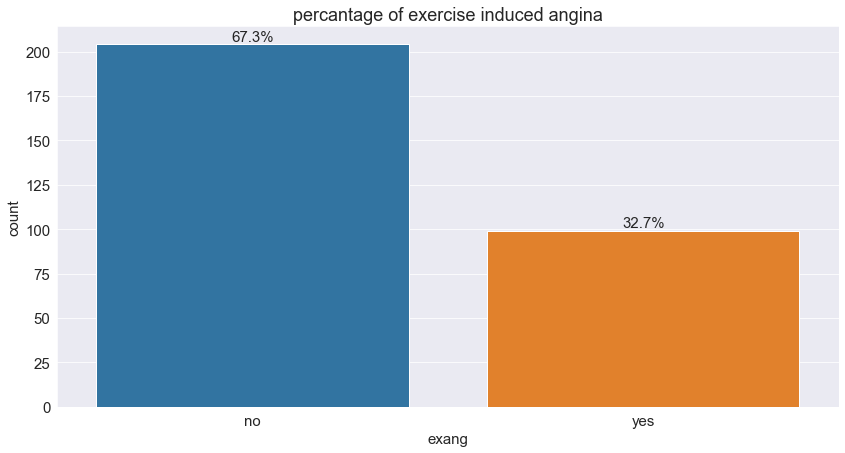

In [74]:
count_plot(data = heart , x ="exang" , title="percantage of exercise induced angina" , prop=True)

<h3>oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
</h3>

In [75]:
heart["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 'no', 0.5, 1.6, 1.2, 0.2, 1.8,
       'yes', 2.6, 1.5, 3.0, 2.4, 0.1, 1.9, 4.2, 1.1, 2.0, 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4.0, 5.6, 2.9, 2.1, 3.8,
       4.4], dtype=object)

In [76]:
heart["oldpeak"].replace({"yes":1 , "no":0} , inplace =True)
heart["oldpeak"]=heart["oldpeak"].astype(float)

In [77]:
heart["oldpeak"].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

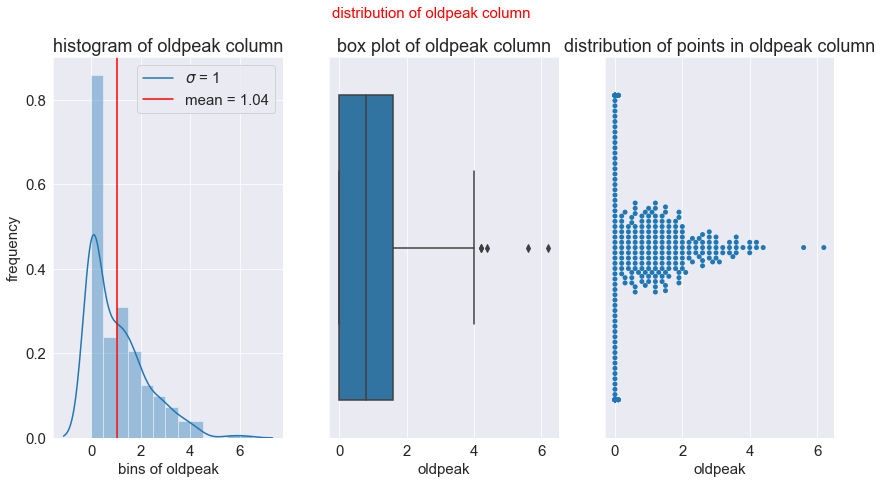

In [78]:
oldpeak_bins = np.arange(0 , 6.2+0.5 ,0.5 )
plot_disribution(data = heart , x ="oldpeak" ,color =base_color , bins =oldpeak_bins )

<h3>oldpeak info</h3>
<ul>
    <li>distribution of oldpeak skewed to right that means most of pepole belong to low oldpeak </li>
    <li>pepole that have oldpeak greater than 4 are few and consider as outlier</li>
</ul>

<h3 id ="Q12">Q12: Is age has impact on oldpeak ? 🤔</h3>

In [79]:
heart[["age" , "oldpeak"]].corr()

,age,oldpeak
age,1.000000,0.210013
oldpeak,0.210013,1.000000


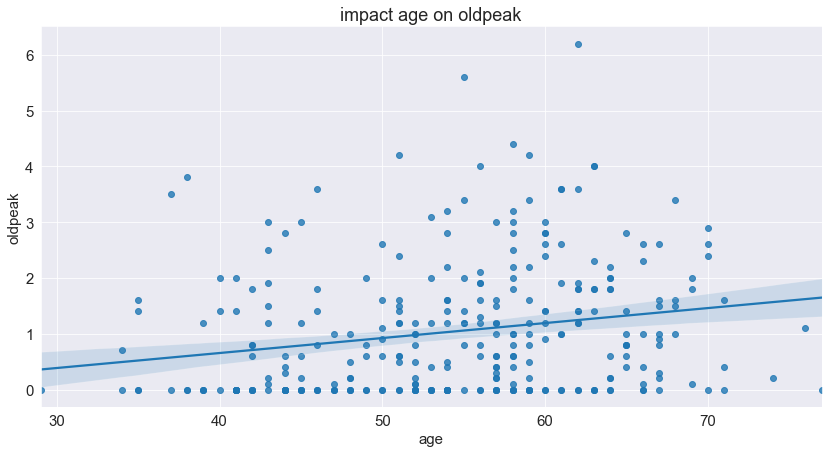

In [122]:
sns.regplot(data = heart , x ="age" , y="oldpeak" )
plt.title("impact age on oldpeak")
plt.show()

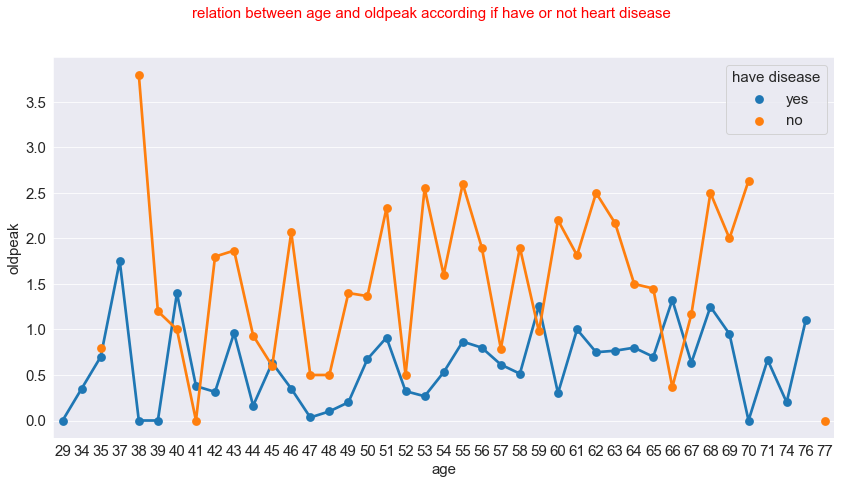

In [81]:
g =sns.pointplot(data = heart , x ="age" , y="oldpeak" , hue ="have disease" , ci =None)
plt.suptitle("relation between age and oldpeak according if have or not heart disease" , color ="red" , fontsize =15)
plt.show()

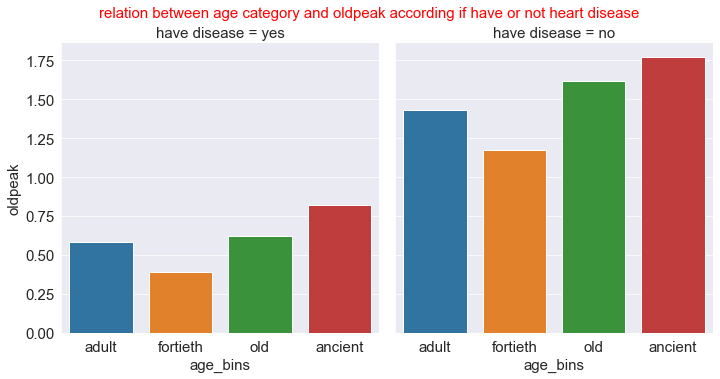

In [82]:
sns.catplot(data = heart , x ="age_bins" , y="oldpeak" , col ="have disease" , ci =None , 
           kind ="bar")
plt.suptitle("relation between age category and oldpeak according if have or not heart disease" , color ="red" , fontsize =15 ,
            y =1.01)
plt.show()

<h3>Answer Q12</h3>
<ol>
    <li>impact ages on oldpeak is a little but we can see in highest old such from old to ancient in case of have heart
        disease or not it slightly increase </li>
</ol>

<h3>slope - the slope of the peak exercise ST segment</h3>
<ul>
    <li>0: Upsloping: better heart rate with excercise (uncommon)</li>
    <li>1: Flatsloping: minimal change (typical healthy heart)</li>
    <li>2: Downslopins: signs of unhealthy heart</li>
</ul>

In [84]:
heart["slope"].unique()

array(['no', 2, 'yes'], dtype=object)

In [85]:
heart["slope"].replace({"no":"Up Sloping" , 
                       "yes":"Flat Sloping" , 
                       2:"Downsloping"} , inplace =True)

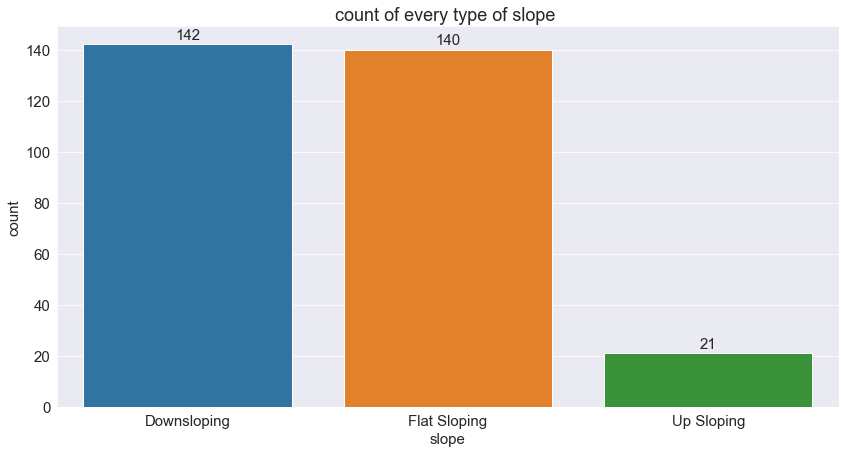

In [86]:
count_plot(data = heart , x ="slope" , title="count of every type of slope ")

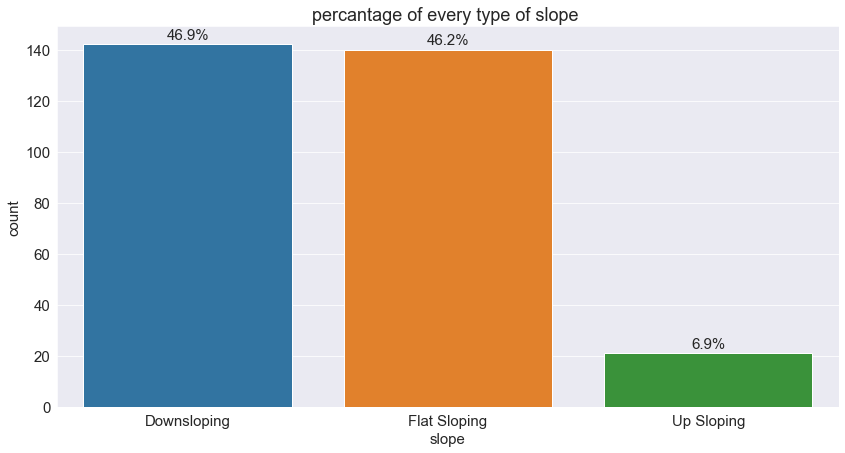

In [87]:
count_plot(data = heart , x ="slope" , title="percantage of every type of slope " , prop=True)

In [99]:
heart.head()

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,have disease,age_bins
0,63,male,Asymptomatic,145,233,have diabetes,Nothing to note,150,no,2.3,Up Sloping,no,yes,yes,ancient
1,37,male,Non-anginal pain,130,250,haven't diabetes,SF-T,187,no,3.5,Up Sloping,no,2,yes,adult
2,41,female,Atypical Angina,130,204,haven't diabetes,Nothing to note,172,no,1.4,Downsloping,no,2,yes,fortieth
3,56,male,Atypical Angina,120,236,haven't diabetes,SF-T,178,no,0.8,Downsloping,no,2,yes,old
4,57,female,Typical Angina,120,354,haven't diabetes,SF-T,163,yes,0.6,Downsloping,no,2,yes,old


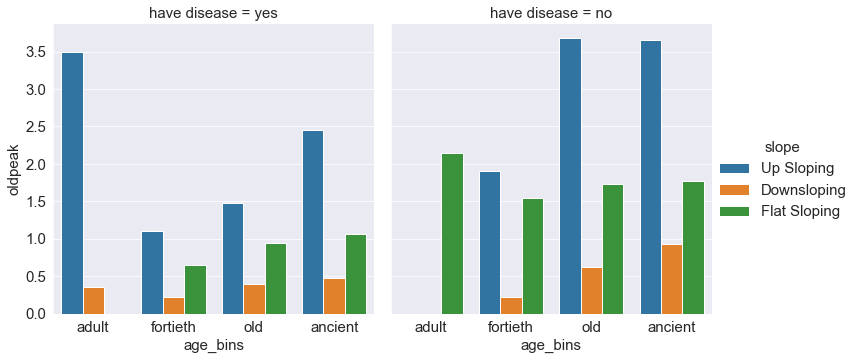

In [105]:
sns.catplot(data = heart , x ="age_bins" , y="oldpeak" , col ="have disease" , ci =None , 
           kind ="bar" , hue ="slope")

<ul>
    <li>we see that Up sloping is exist more in pepole that have disease and adult and if he grow the oldpeak of every 
        kind of slope in increase when age increased</li>
    <li>and also in pepole that haven't heart disease </li>
</ul>

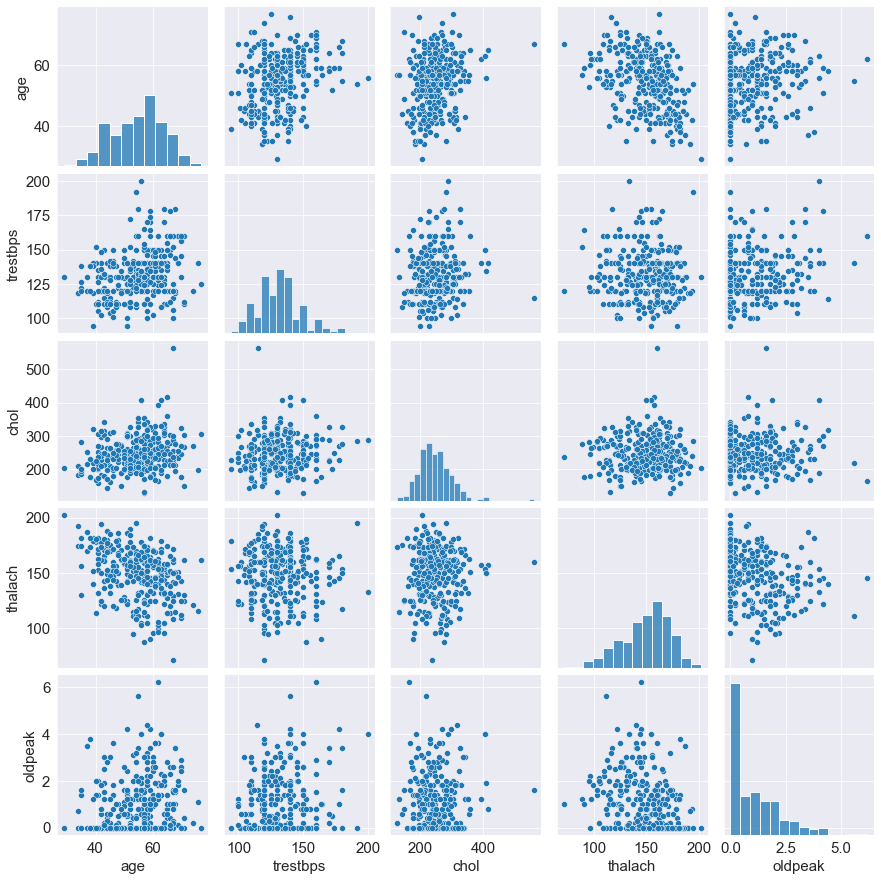

In [109]:
sns.pairplot(heart , vars = heart.select_dtypes("number").columns)

In [125]:
!jupyter nbconvert file Project3.ipynb --to slides --no-input --no-prompt

[NbConvertApp] WARNING | pattern 'file' matched no files
[NbConvertApp] Converting notebook Project3.ipynb to slides
[NbConvertApp] Writing 2815558 bytes to Project3.slides.html
